In [38]:
library("dada2")
library("ShortRead")
fileDirc <- list('/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputA_S1.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFA-1250A_S2.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-250A_S3.joined.filtered.fastq')

In [43]:
reads <- readFastq('/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputA_S1.joined.filtered.fastq')

In [46]:
quality(reads)[1:2]

class: FastqQuality
quality:
  A BStringSet instance of length 2
    width seq
[1]    21 BBB?BBBBBBBBBBBBBBBBB
[2]    21 B;BBBBBBBBBB?BBBBBBBB

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


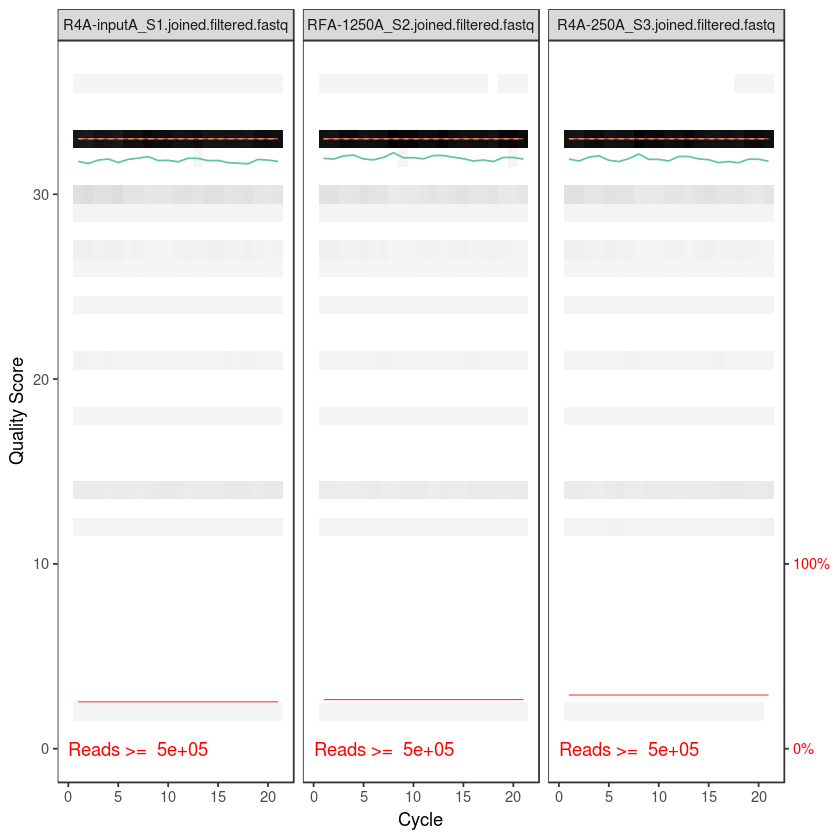

In [39]:
root <- '/mnt/storage/projects/k-seq/working/dada2'
plotQualityProfile(fileDirc[0:3])

In [34]:
help(plotQualityProfile)

## Learning error

ERROR: Error in dircList(28): could not find function "dircList"


In [56]:
dircList <- list(
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputA_S1.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFA-1250A_S2.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-250A_S3.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-50A_S4.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-10A_S5.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-2A_S6.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-0A_S7.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputB_S8.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFA-1250B_S9.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-250B_S10.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-50B_S11.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-10B_S12.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-2B_S13.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-0B_S14.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-inputA_S15.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFB-1250A_S16.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-250A_S17.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-50A_S18.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-10A_S19.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-2A_S20.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-0A_S21.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-inputB_S22.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFB-1250B_S23.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-250B_S24.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-50B_S25.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-10B_S26.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-2B_S27.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-0B_S28.joined.filtered.fastq')

dadaResList <- list(0)

for (i in 1:28){
    err <- learnErrors(dircList[i], multithread = TRUE)
    derep <- derepFastq(dircList[i], verbose = TRUE)
    dadaRes <- dada(derep, err = err, multithread = TRUE)
    dadaResList <- c(dadaResList, dadaRes)
    print(i)
}

41425125 total bases in 1972625 reads from 1 samples will be used for learning the error rates.


ERROR: Error in derepFastq(dircList[i], verbose = TRUE): Filenames must be provided in character format.


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

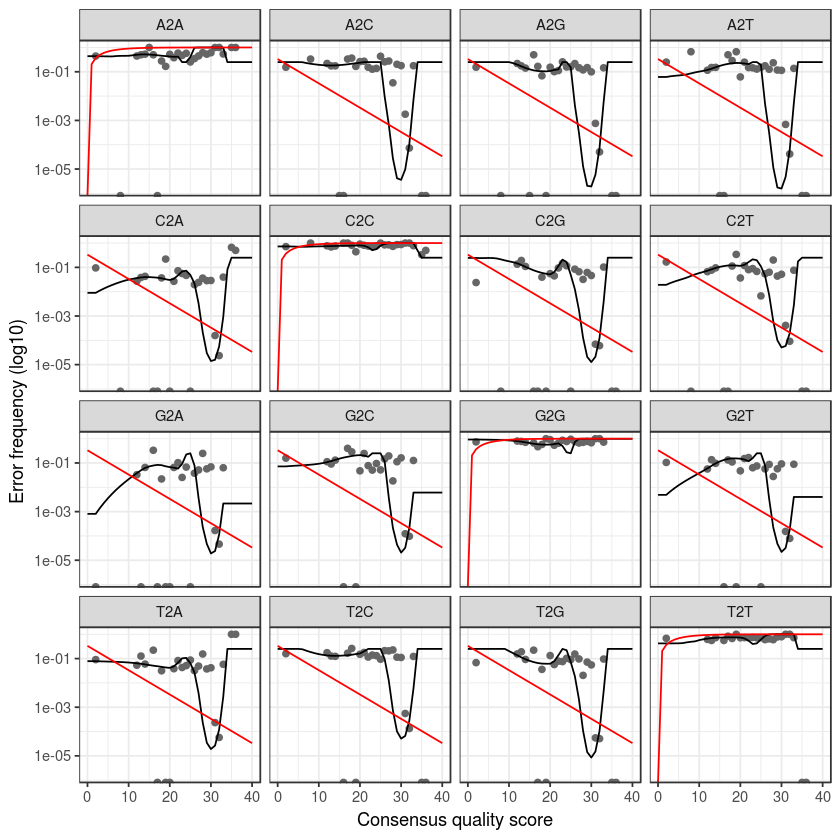

In [36]:
plotErrors(err, nominalQ = TRUE, )

In [97]:
dirc <- '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputA_S1.joined.filtered.fastq'
err <- learnErrors(dirc, multithread = TRUE)
derep <- derepFastq(dirc, vserbose = TRUE)
dadaRes <- dada(derep, err = err, multithread = TRUE)
denoised <- dadaRes$clustering

41425125 total bases in 1972625 reads from 1 samples will be used for learning the error rates.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputA_S1.joined.filtered.fastq
.Encountered 312944 unique sequences from 1972625 total sequences read.


Sample 1 - 1972625 reads in 312944 unique sequences.


In [155]:
dadaRes$denoised[denoised$map[match('TTCACCTAGGTCATCGAGTGT', names(derep$uniques))]]

CTGTTTCAAACAATCGGTCGC 
                  344

In [107]:
testSeqs <- c('TTCACCTAGGTCATCGAGTGT', 'CCGCTTCAAACAATCGGTTTG', 'CTGTTTCAAACAATCGGCCTG', 'CCAGTCTTCAAACAATCGGTC', 'TCGCCCTTCAAACAATCGGTC', 'AGCCCGCTTCAAACAATCGGT', 'TTCCTGCTTCAAGCAATCGGT')

In [123]:
is.element(testSeqs, denoised$clustering[['sequence']])

[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE

In [160]:
denoised$

[1] 22

In [167]:
dadaRes$denoised[dadaRes$map[match('TTCACCTAGGTCATCGAGTGT', names(derep$uniques))]]

CTACTTCAAACAATCGGTCTG 
               305709